## **Imputing Numerical Data**

**1. Arbitrary Value Imputation**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
titanic_df = pd.read_csv('D:/Academics/AI/Data Sets/CampusX/Titanic.csv')

In [26]:
titanic_df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [27]:
titanic_df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [29]:
titanic_df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [30]:
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 3)
(712,)
(179, 3)
(179,)


**Here we will create 4 new columns and fill the 'Age' column with the value 99 and -1 and the 'Fare' column with the value 999 and -1**

In [10]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [11]:
print('The original value in the Age variable variance is:', X_train['Age'].var())
print('Age variance after Imputing the age column with the value 99 is:', X_train['Age_99'].var())
print('Age variance after Imputing the age column with the value -1 is:', X_train['Age_minus1'].var())
print('--------------------------------------------------------------------------------------------')
print('The original value in the Fare variable variance is:', X_train['Fare'].var())
print('Variance after Imputing the Fare column with the value 999 is:', X_train['Fare_999'].var())
print('Variance after Imputing the Fare column with the value -1 is:', X_train['Fare_minus1'].var())

The original value in the Age variable variance is: 204.34951339046142
Age variance after Imputing the age column with the value 99 is: 951.7275570187188
Age variance after Imputing the age column with the value -1 is: 318.0896202624488
--------------------------------------------------------------------------------------------
The original value in the Fare variable variance is: 2448.1979137063163
Variance after Imputing the Fare column with the value 999 is: 47219.202652176304
Variance after Imputing the Fare column with the value -1 is: 2378.5676784883494


**Plotting a graph for Age**

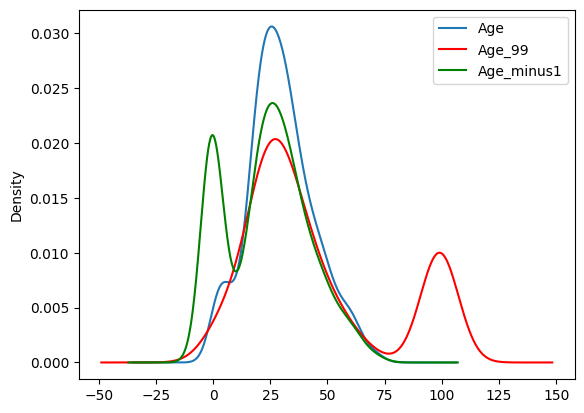

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Age'].plot(kind='kde', ax=ax)

# Variable Imputed with Mean
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# Variable Imputed with Median
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

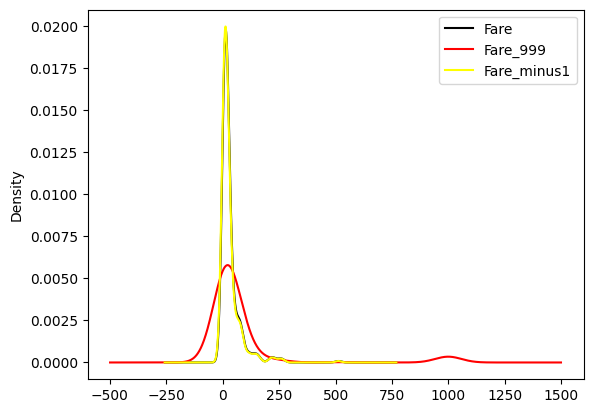

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Fare'].plot(kind='kde', ax=ax, color='black')

# Variable Imputed with Mean
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# Variable Imputed with Median
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='yellow')

# Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [35]:
X_train.cov()

,Age,Fare,Family
Age,204.349513,70.719262,-6.498901
Fare,70.719262,2448.197914,17.258917
Family,-6.498901,17.258917,2.735252


In [36]:
X_train.corr()

,Age,Fare,Family
Age,1.000000,0.092644,-0.299113
Fare,0.092644,1.000000,0.208268
Family,-0.299113,0.208268,1.000000


## **Imputing values using Sklearn**

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [39]:
from sklearn.compose import ColumnTransformer

In [40]:
trf = ColumnTransformer([('imputer1', imputer1, ['Age']), ('imputer2', imputer2, ['Fare'])], remainder='passthrough')

In [41]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [42]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [43]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [44]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [45]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])